<H1>Fetch Data Analyst Take Home Assignment</H1>

**Submitted by Nidhi Srinath**

<H3>Data Exploration - Users Table </H3>

In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
#Importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [3]:
#Importing the users table
users = pd.read_csv("USER_TAKEHOME.csv")
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female


<h4>While checking for data quality issues within a Pandas dataframe we can do the following checks - </h4>
<li>Data Type</li>
<li>Missing/Null Values</li>
<li>Duplicate Records</li>
<li>Validity(Checking the data range, length, invalid characters, inconsistent data entry)</li>
<li>Outliers/Distribution</li>

<br>**1. Data Type Check**

In [4]:
# Checking the information of the dataset
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


Based on the relationship model, we know the expected data types for the users table
<br>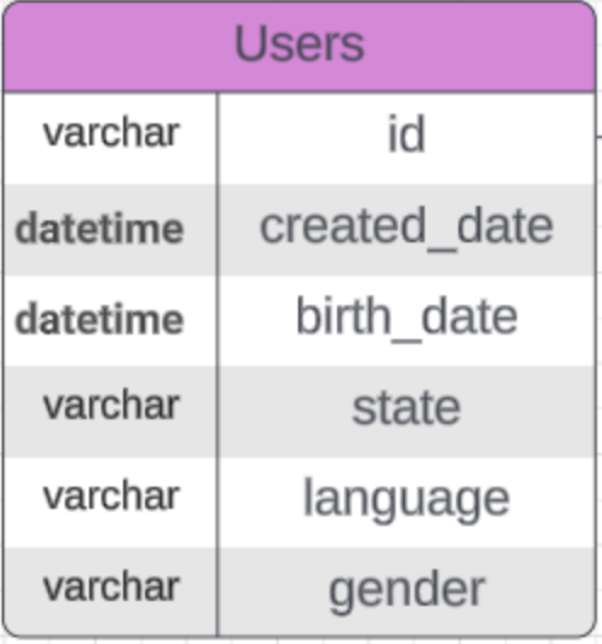

The two date columns need to be converted to the datetime data type

In [5]:
#Converting the date columns to their respective datatypes
users['CREATED_DATE'] = pd.to_datetime(users['CREATED_DATE'], errors ="ignore")
users['BIRTH_DATE'] = pd.to_datetime(users['BIRTH_DATE'], errors = "ignore")
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   ID            100000 non-null  object             
 1   CREATED_DATE  100000 non-null  datetime64[ns, UTC]
 2   BIRTH_DATE    96325 non-null   datetime64[ns, UTC]
 3   STATE         95188 non-null   object             
 4   LANGUAGE      69492 non-null   object             
 5   GENDER        94108 non-null   object             
dtypes: datetime64[ns, UTC](2), object(4)
memory usage: 4.6+ MB


,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female


**2. Missing Values Check**

In [6]:
#Checking the percentage of missing values and visualizing the nulls
users.isna().sum()/len(users)

ID              0.00000
CREATED_DATE    0.00000
BIRTH_DATE      0.03675
STATE           0.04812
LANGUAGE        0.30508
GENDER          0.05892
dtype: float64

<Axes: >

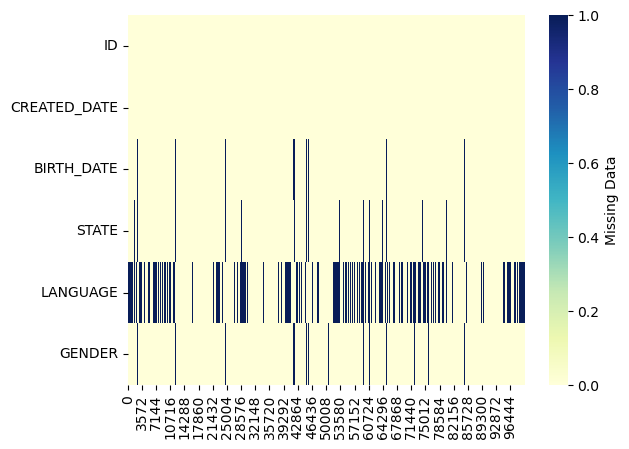

In [7]:
sns.heatmap(users.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

~4% of the birth_date column, ~5% of the state column, ~31% of the language column and ~6% of the gender column is null.

Before understanding how to handle nulls, it is also necessary to check for duplicates in the dataset and the quality of data to determine the best next steps.
<br> 
<br>**3. Duplicate Records Check**
<br>The columns within the Users table are mostly bound to have duplicates when evaluated separately. Multiple users may have -
created an account on the same day, have the same birth dates, states, languages, and genders. Duplicates in this context are when the same USER_ID has been duplicated with different values for the columns. 
<br>
For eg: USER_ID - **5ef3b4f17053ab141787697d** cannnot have two created dates or two different birthdays.

In [8]:
#Checking for duplicate in the dataset
duplicate_rows = users[users.duplicated(keep=False)]
print(f"There are",duplicate_rows.shape[0],"duplicates.")

There are 0 duplicates.


Since there are no duplicates, we can handle the nulls based on the field and it's importance to our problem statements. 
<br>
<br>**4. Validity Check and Outlier Distribution**
<br> Gender

In [9]:
#Checking for unique values in the gender column
users["GENDER"].unique()

array(['female', nan, 'male', 'non_binary', 'transgender',
       'prefer_not_to_say', 'not_listed', 'Non-Binary', 'unknown',
       'not_specified', "My gender isn't listed", 'Prefer not to say'],
      dtype=object)

As seen above there are redundant gender types such as 'not_listed' and "My gender isn't listed", "Prefer not to say" and "prefer_not_to_say". To further clean up this column, we can consolidate the categories - "nan", "unknown","not_specified" into a single category and "not_listed" and "My gender isn't listed" into a single category. 


In [10]:
#Regrouping gender values
users["GENDER"] = users["GENDER"].replace({"My gender isn't listed":"not_listed", "Prefer not to say":"not_specified",
                                           "prefer_not_to_say":"not_specified",
                                           "unknown":"not_specified", "Non-Binary":"non_binary"})
users['GENDER'].fillna("not_specified", inplace = True)
users["GENDER"].unique()

array(['female', 'not_specified', 'male', 'non_binary', 'transgender',
       'not_listed'], dtype=object)

<Axes: >

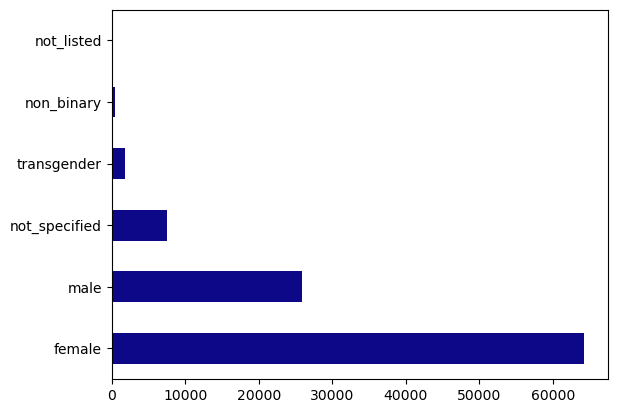

In [11]:
#Checking for the count of each category in the gender column
users['GENDER'].value_counts(dropna = False).plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

Language

In [12]:
#Checking for unique values in the language column
users['LANGUAGE'].unique()

array(['es-419', 'en', nan], dtype=object)

<Axes: ylabel='LANGUAGE'>

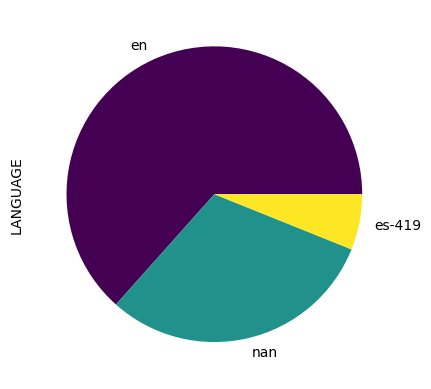

In [13]:
#Checking for the count of each category in the language column
users['LANGUAGE'].value_counts(dropna = False).plot(kind = 'pie', cmap = plt.get_cmap('viridis'))

Language has three unique categories - English, Spanish, and Nulls.
<br>
<br> State

<Axes: >

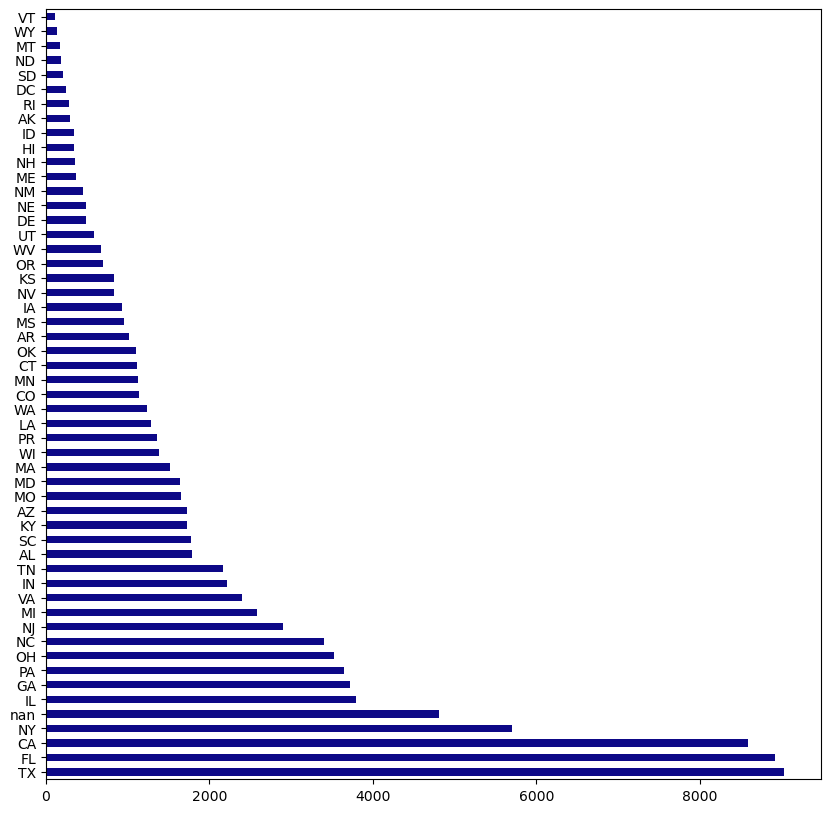

In [14]:
#Checking for unique values in the state column
users['STATE'].unique()
#Checking for the count of each category in the state column
plt.figure(figsize = (10,10))
users['STATE'].value_counts(dropna = False).plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

A significant number of values have nulls for state name. This could be a potential data quality error that prevents analytics that is catered to specific geographical locations.
 <br>
 <br> Created Date

In [15]:
#Checking the number of unique values in the created_date column
users['CREATED_DATE'].nunique()

99942

In [16]:
#Checking the count of values in the created_date column
users['CREATED_DATE'].value_counts(dropna = False)

2023-01-12 18:30:15+00:00    2
2019-08-28 02:21:44+00:00    2
2024-04-11 02:56:41+00:00    2
2024-03-11 17:03:02+00:00    2
2024-02-25 20:43:59+00:00    2
                            ..
2024-08-25 03:30:41+00:00    1
2021-03-12 13:08:04+00:00    1
2024-07-24 19:33:12+00:00    1
2020-12-01 05:25:08+00:00    1
2020-03-25 01:30:30+00:00    1
Name: CREATED_DATE, Length: 99942, dtype: int64

This column seems relatively clean without any null values. Although some values have duplicates, it is still possible that two users create their accounts at the same time.
<br>
<br> Birth Date

In [17]:
#Checking the number of unique values in the birth_date column
users['BIRTH_DATE'].nunique()

54721

In [18]:
#Checking the count of values in the birth_date column
users['BIRTH_DATE'].value_counts(dropna = False)

NaT                          3675
1970-01-01 00:00:00+00:00    1272
1979-12-11 08:00:00+00:00      63
2000-12-12 00:00:00+00:00      28
2000-12-31 00:00:00+00:00      23
                             ... 
2004-02-21 08:00:00+00:00       1
1956-02-09 05:00:00+00:00       1
1974-07-13 00:00:00+00:00       1
1991-05-23 04:00:00+00:00       1
1995-06-09 04:00:00+00:00       1
Name: BIRTH_DATE, Length: 54722, dtype: int64

Birth Date is an important field to determine the demography of the user base. A large number of birth dates are missing and 1,275 records have a placeholder birthdate of '1970-01-01'. This reduces the accuracy of the age data. We can further explore the range to sanity check the values provided in this field

In [19]:
#Using the describe function to assess the statistical properties of the data
today = date.today()
users["AGE"] = today.year - users["BIRTH_DATE"].dt.year
users['AGE'].describe()

count    96325.000000
mean        40.827874
std         15.160172
min          3.000000
25%         27.000000
50%         40.000000
75%         51.000000
max        125.000000
Name: AGE, dtype: float64

This distribution shows us that there are many erraneous data entries. The minimum age in the dataset is 3 and maximum age is 125. These seem to be outliers that will skew analysis results. We can understand the distribution better using some visualizations.

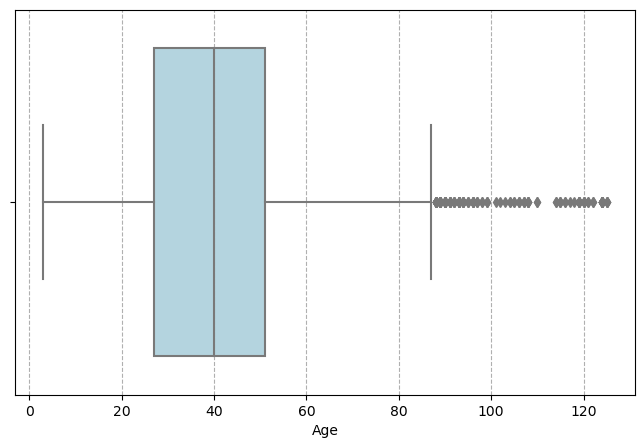

In [20]:
#Box plot for age analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x=users['AGE'].dropna(), color="lightblue")


plt.xlabel("Age")
plt.grid(axis='x', linestyle='--')


plt.show()

The box plot visualizes the statistical intervals displayed above. We have a median age of 40 with an interquartile range of 27 to 51. The whiskers extend to ages 3 and ~90 with outliers beyond 100 years. We can check the distribution of the birth date column to check the frequency of age.

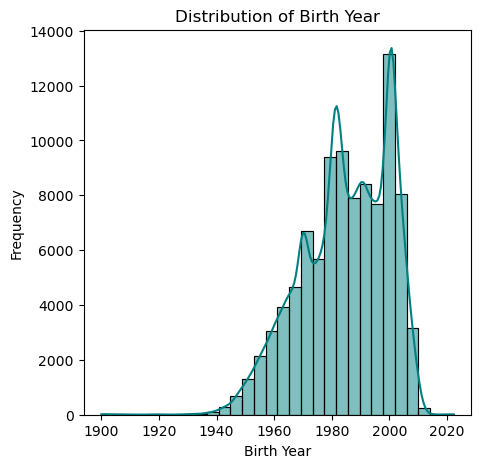

In [21]:
#Birth Date Distribution
plt.figure(figsize=(5, 5))
sns.histplot(users['BIRTH_DATE'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of Birth Year")
plt.xlabel("Birth Year")
plt.ylabel("Frequency")
plt.show()

The distribution is right skewed and there is an added bias of outliers. Since our data contains a range that includes outliers, we can further identify the outliers and eliminate them to reduce bias in our analysis.

In [22]:
#Identifying the interquartile range
Q1 = users["AGE"].quantile(0.25)
Q3 = users["AGE"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create an 'Outlier_Flag' column
users['Outliers'] = np.where((users["AGE"] < lower_bound) | (users["AGE"] > upper_bound), 1, 0)

# Display flagged outliers
users.head()

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,AGE,Outliers
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00+00:00,CA,es-419,female,25.0,0
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00+00:00,PA,en,female,24.0,0
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00+00:00,FL,es-419,female,31.0,0
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaT,NC,en,not_specified,NaN,0
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00+00:00,PA,en,female,53.0,0


**Summary -
<br> The users table contains nulls in the birth_date, state, language, and gender fields. This could cause issues when trying to perform an analysis on the user demographics. We could further explore imputation techniques to fill some of the null values based on addition context into the users table data. Imputation techniques can include filling null values with the mean, median, or mode, or filling up or down, or using machine learning algorithms such as regression and K Nearest Neighbours.**

<h3> Data Exploration - Products Table</h3>

In [23]:
#Importing the products table
products = pd.read_csv("PRODUCTS_TAKEHOME.csv")
products.head()

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11


<h4>While checking for data quality issues within a Pandas dataframe we can do the following checks - </h4>
<li>Data Type</li>
<li>Missing/Null Values</li>
<li>Duplicate Records</li>
<li>Validity(Checking the data range, length, invalid characters, inconsistent data entry)</li>
<li>Outliers/Distribution</li>

<br>**1. Data Type Check**

In [24]:
# Checking the information of the dataset
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


Based on the relationship model, we know the expected data types for the products table
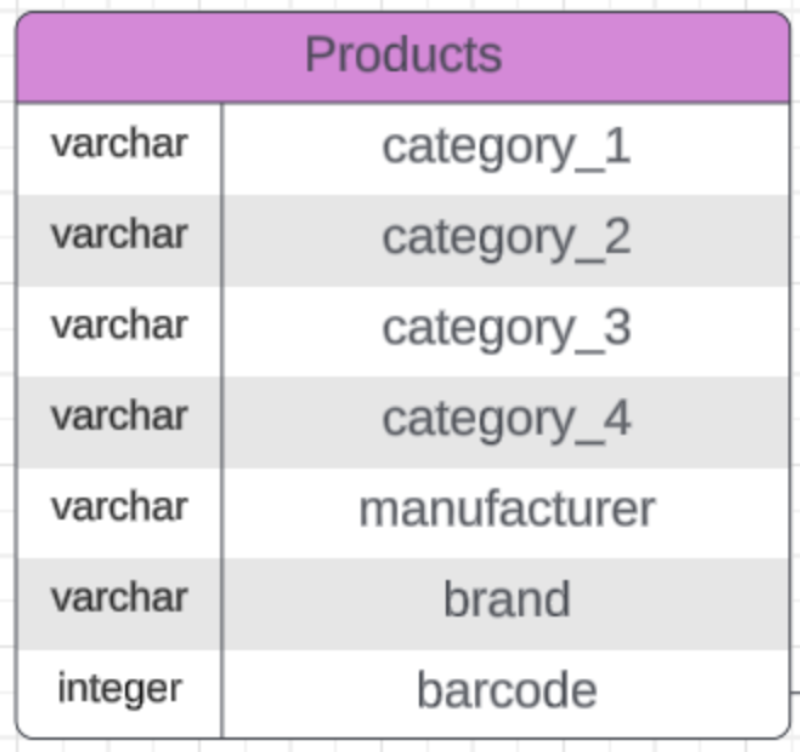

All data types seem to be matching what is required.
<br>
<br> **2. Missing/Null Values Check**

In [25]:
#Checking the percentage of missing values
products.isna().sum()/len(products)

CATEGORY_1      0.000131
CATEGORY_2      0.001684
CATEGORY_3      0.071629
CATEGORY_4      0.920219
MANUFACTURER    0.267842
BRAND           0.267839
BARCODE         0.004760
dtype: float64

5% of the CATEGORY_3 column, 92% of the CATEGORY_4 column, 26% of the MANUFACTURER column, 27% of the BRAND column, and 0.4% of the BARCODE column is missing.

<Axes: >

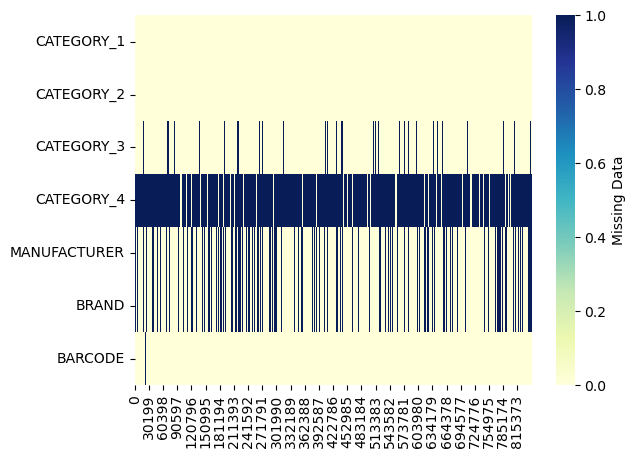

In [26]:
# Visualizing nulls using a heatmap
sns.heatmap(products.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

**3. Duplicates Check**

In [27]:
#Checking for duplicate in the dataset
duplicate_rows = products[products.duplicated(keep=False)]
print(f"There are",duplicate_rows.shape[0],"duplicates.")

There are 400 duplicates.


This means that there are 400 rows with the same bar code and same values within the products table. We can blindly drop all the duplicate values and only keep the top value.

In [28]:
#Keeping the first row and dropping the remaining duplicate rows
products = products.drop_duplicates()

#Checking for duplicate in the dataset
duplicate_rows = products[products.duplicated(keep=False)]
print(f"There are",duplicate_rows.shape[0],"duplicates.")

There are 0 duplicates.


After dropping all the identical rows and only retaining the first occurance, we also need to make sure that we check if the same barcode is being used for different values.

In [29]:
#Checking for duplicate barcodes
duplicate_rows = products[products.duplicated(subset = ['BARCODE'],keep=False)]
print(f"There are",duplicate_rows.shape[0],"barcode duplicates.")

There are 4022 barcode duplicates.


In [30]:
#Identifying the duplicate barcodes
dup_barcode = products['BARCODE'].value_counts(dropna = False)
print(dup_barcode)

NaN             3968
2.073306e+07       2
5.042617e+07       2
3.473009e+06       2
3.422007e+06       2
                ... 
7.192838e+11       1
4.342719e+10       1
7.007121e+11       1
1.816948e+10       1
7.967933e+11       1
Name: BARCODE, Length: 841343, dtype: int64


Now that we know there are multiple duplicate barcodes, we can check the validity of the columns. 
<br>
<br>**4. Validity Check**
<br>
<br> Category 1

In [31]:
#Checking for unique values
products['CATEGORY_1'].unique()

array(['Health & Wellness', 'Snacks', 'Beverages', 'Pantry', 'Alcohol',
       'Apparel & Accessories', 'Restaurant', 'Needs Review', 'Dairy',
       'Home & Garden', nan, 'Household Supplies', 'Meat & Seafood',
       'Deli & Bakery', 'Sporting Goods', 'Produce', 'Office & School',
       'Frozen', 'Arts & Entertainment', 'Animals & Pet Supplies',
       'Electronics', 'Beauty', 'Toys & Games', 'Mature',
       'Vehicles & Parts', 'Baby & Toddler', 'Luggage & Bags', 'Media'],
      dtype=object)

<Axes: >

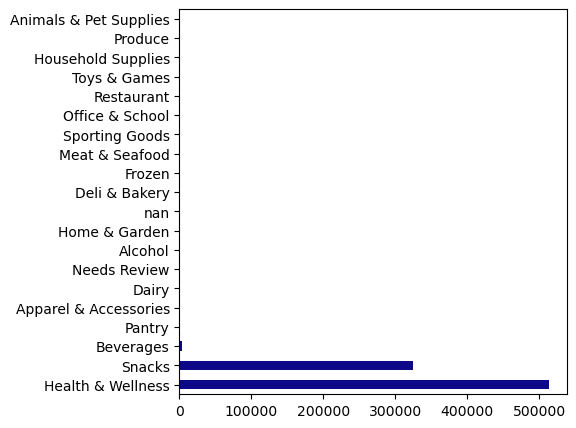

In [32]:
#Checking the count of values for each category
plt.figure(figsize = (5,5))
cat_2_count = products['CATEGORY_1'].value_counts(dropna = False).head(20)
cat_2_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

The table only contains products in three categories - Beverages, Snacks, and Health and Wellness.
<br>
<br> Category 2

<Axes: >

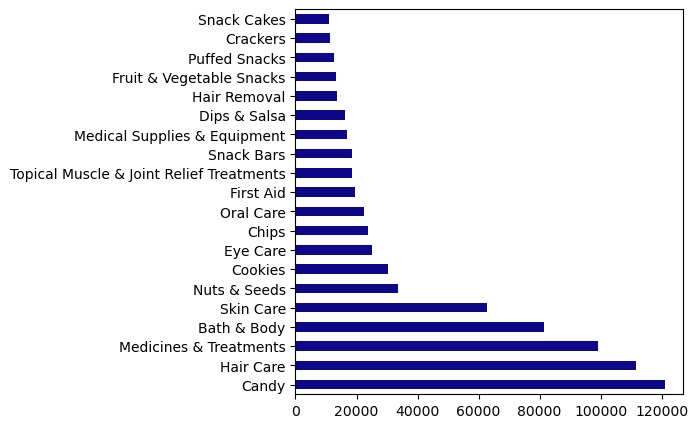

In [33]:
#Checking the count of values for the top 20 categories
plt.figure(figsize = (5,5))
cat_2_count = products['CATEGORY_2'].value_counts(dropna = False).head(20)
cat_2_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

<br>Category 3

<Axes: >

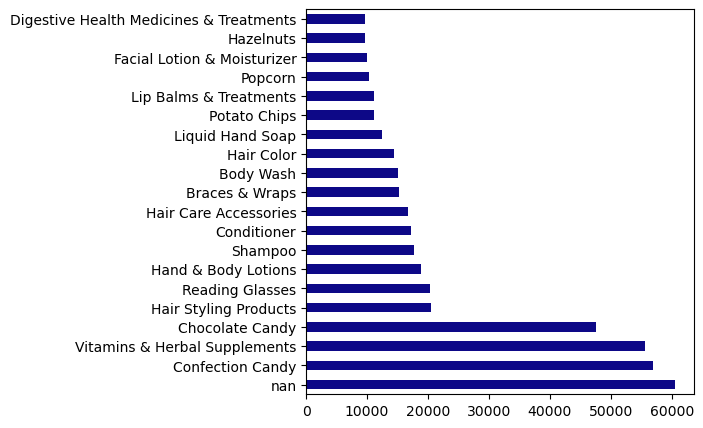

In [34]:
#Checking the count of values for top 20 categories
plt.figure(figsize = (5,5))
cat_3_count = products['CATEGORY_3'].value_counts(dropna = False).head(20)
cat_3_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

We have a large majority of nulls in the category 3 as we discovered previously.
<br>
<br> Category 4

<Axes: >

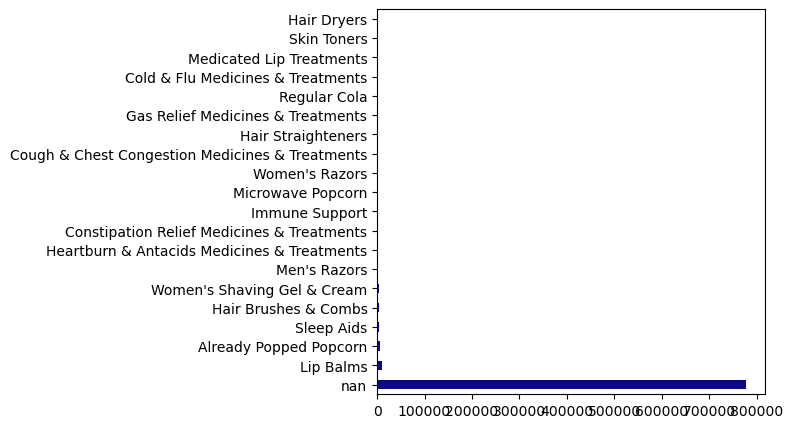

In [35]:
#Checking the count of values for top 20 categories
plt.figure(figsize = (5,5))
cat_4_count = products['CATEGORY_4'].value_counts(dropna = False).head(20)
cat_4_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

Category 4 only has a large fraction of null values.
<br>
<br> Brand

<Axes: >

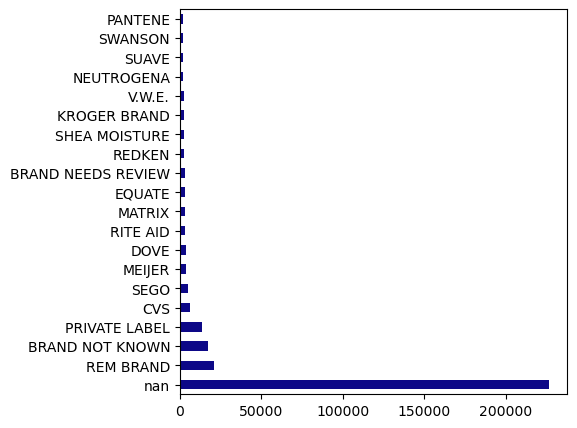

In [36]:
#Checking the count of values for top 20 brands
plt.figure(figsize = (5,5))
brand_count = products['BRAND'].value_counts(dropna = False).head(20)
brand_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

We have a majority of null brands but we also have values such as "Private Label" and "Brand not known" which seem to be placeholder values. This could skew brand based analytics.
<br>
<br>Manufacturers

<Axes: >

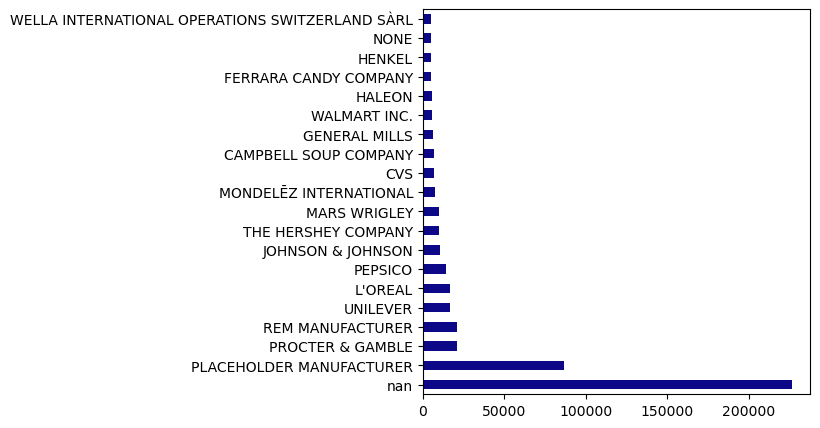

In [37]:
#Checking the count of values for top 20 manufacturers
plt.figure(figsize = (5,5))
manf_count = products['MANUFACTURER'].value_counts(dropna = False).head(20)
manf_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

A majority of the values are nulls and we also have placeholder values that can skew the results.

**Summary - 
<br> A lot of the data in the products table is incomplete or missing. We have duplicate barcodes which makes it hard to uniquely identify the category-brand-manufacturer combinations. We have a lot of nulls in the category_3, category_4, manufacturer, and brand columns. This would prevent us from performing specific analytics around products/brands.**

<h3> Data Exploration - Transactions Table </h3>

In [38]:
#Importing the transactions table
transactions = pd.read_csv("TRANSACTION_TAKEHOME.csv")
transactions.head()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,


<h4>While checking for data quality issues within a Pandas dataframe we can do the following checks - </h4>
<li>Data Type</li>
<li>Missing/Null Values</li>
<li>Duplicate Records</li>
<li>Validity(Checking the data range, length, invalid characters, inconsistent data entry)</li>
<li>Outliers/Distribution</li>

<br>**1. Data Type Check**

In [39]:
# Checking the information of the dataset
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


Based on the relationship model, we know the expected data types for the transactions table
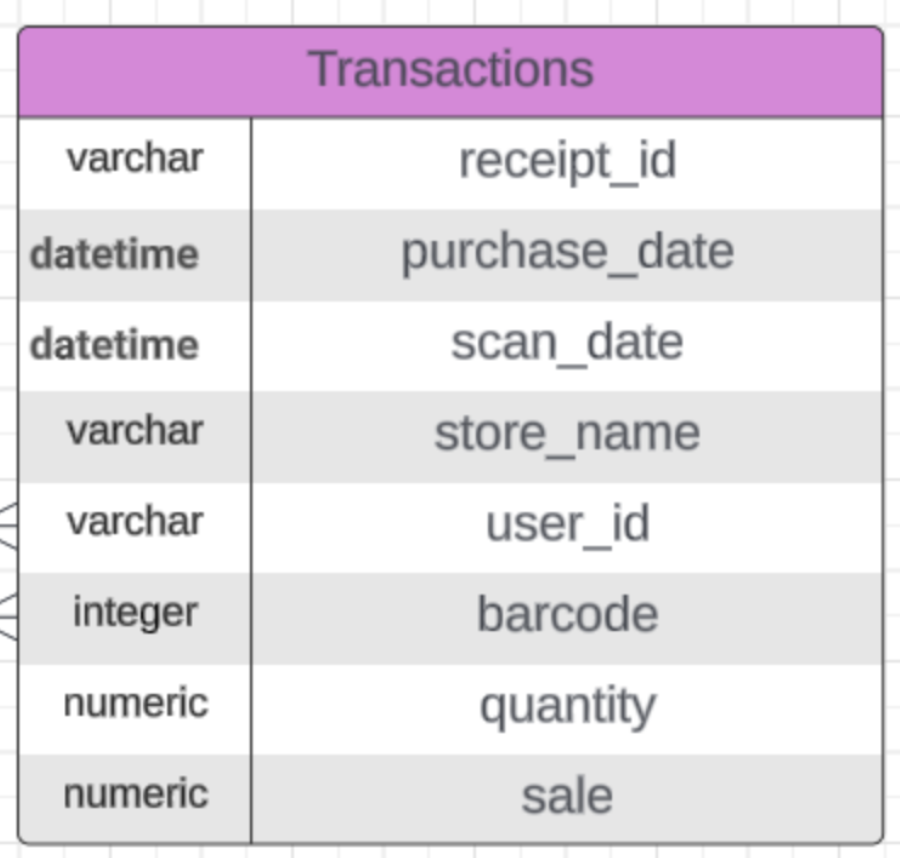

The date columns need to be converted into date time format, the final_quantity and final_sale columns need to be converted into integers.

In [40]:
# Converting the columns to their respective data types
transactions['PURCHASE_DATE'] = pd.to_datetime(transactions['PURCHASE_DATE'], errors ="coerce")
transactions['SCAN_DATE'] = pd.to_datetime(transactions['SCAN_DATE'], errors ="coerce")
transactions['FINAL_QUANTITY'] = pd.to_numeric(transactions['FINAL_QUANTITY'], errors ="coerce")
transactions['FINAL_SALE'] = pd.to_numeric(transactions['FINAL_SALE'], errors ="coerce")
transactions.info()
transactions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   RECEIPT_ID      50000 non-null  object             
 1   PURCHASE_DATE   50000 non-null  datetime64[ns]     
 2   SCAN_DATE       50000 non-null  datetime64[ns, UTC]
 3   STORE_NAME      50000 non-null  object             
 4   USER_ID         50000 non-null  object             
 5   BARCODE         44238 non-null  float64            
 6   FINAL_QUANTITY  37500 non-null  float64            
 7   FINAL_SALE      37500 non-null  float64            
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(3), object(3)
memory usage: 3.1+ MB


,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,NaN,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,NaN,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,NaN


**2. Missing Values Check**

In [41]:
#Checking the percentage of missing values
transactions.isna().sum()/len(transactions)

RECEIPT_ID        0.00000
PURCHASE_DATE     0.00000
SCAN_DATE         0.00000
STORE_NAME        0.00000
USER_ID           0.00000
BARCODE           0.11524
FINAL_QUANTITY    0.25000
FINAL_SALE        0.25000
dtype: float64

<Axes: >

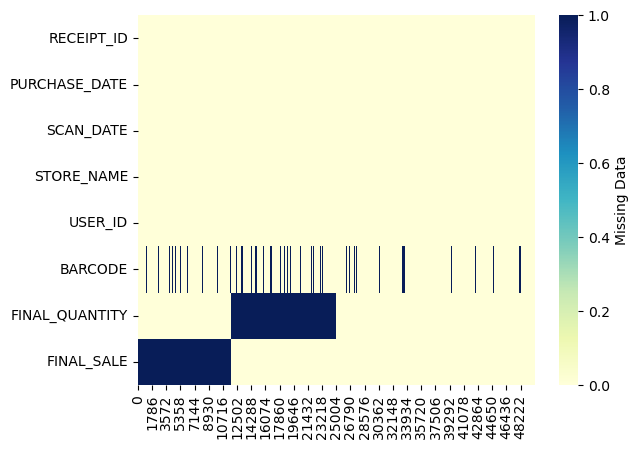

In [42]:
# Visualizing nulls using a heatmap
sns.heatmap(transactions.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

There are 11% of barcode values missing and 25% of final quantity and final sale values missing. This could be very tricky to handle since it is hard to determine the final sale amount and quantities without knowing what each product associated with a barcode costs. To be able to accurately fill out the $ amount, we will need price information associated with each barcode. 

We can first drop duplicates across the table. This would remove all rows that have the exact same values across the table.
<br>
<br>**3.Duplicates Check**

In [43]:
#Checking for duplicate in the dataset
duplicate_rows = transactions[transactions.duplicated(keep=False)]
print(f"There are",duplicate_rows.shape[0],"duplicates.")

There are 320 duplicates.


In [44]:
#Dropping duplicates from the transactions table that have the same value across the table
transactions = transactions.drop_duplicates()
duplicate_rows = transactions[transactions.duplicated(keep=False)]
print(f"There are",duplicate_rows.shape[0],"duplicates.")

There are 0 duplicates.


Now that all the duplicates have been removed we can check the distribution of values across the columns to identify what needs to be dropped/updated.
<br>
<br>**4. Validity/Distribution Check**
<br>
<br> Reciept ID

In [45]:
#Checking for duplicated values
transactions['RECEIPT_ID'].duplicated().sum()

25389

In [46]:
#Checking count of reciept IDs
transactions['RECEIPT_ID'].value_counts(dropna=False)

0fb89572-c817-47e2-bd11-6f467baacbb2    6
98d68d5d-71f1-4528-a83d-cdf6d308c79b    6
d6b3acb1-2c78-41f0-86be-9b65dae6c6b7    6
2acd7e8d-37df-4e51-8ee5-9a9c8c1d9711    6
f1808dd8-868b-4745-ad53-4178ef5fa1f8    6
                                       ..
56a368e6-d677-459d-ba05-70a886c3126b    2
56a0e14c-187c-43ec-96ab-b67ac5c197f1    2
569f4be9-63d1-4afd-8ed5-d520ce85b878    2
56946262-15b1-41fd-8814-fc544d35fc6c    2
fffe8012-7dcf-4d84-b6c6-feaacab5074a    2
Name: RECEIPT_ID, Length: 24440, dtype: int64

Since we have removed duplicates across the table, we can interpret the receipt ID having multiple counts as the receipts with multiple products on a sinlge receipt ID.
<br>
<br> Purchase Date

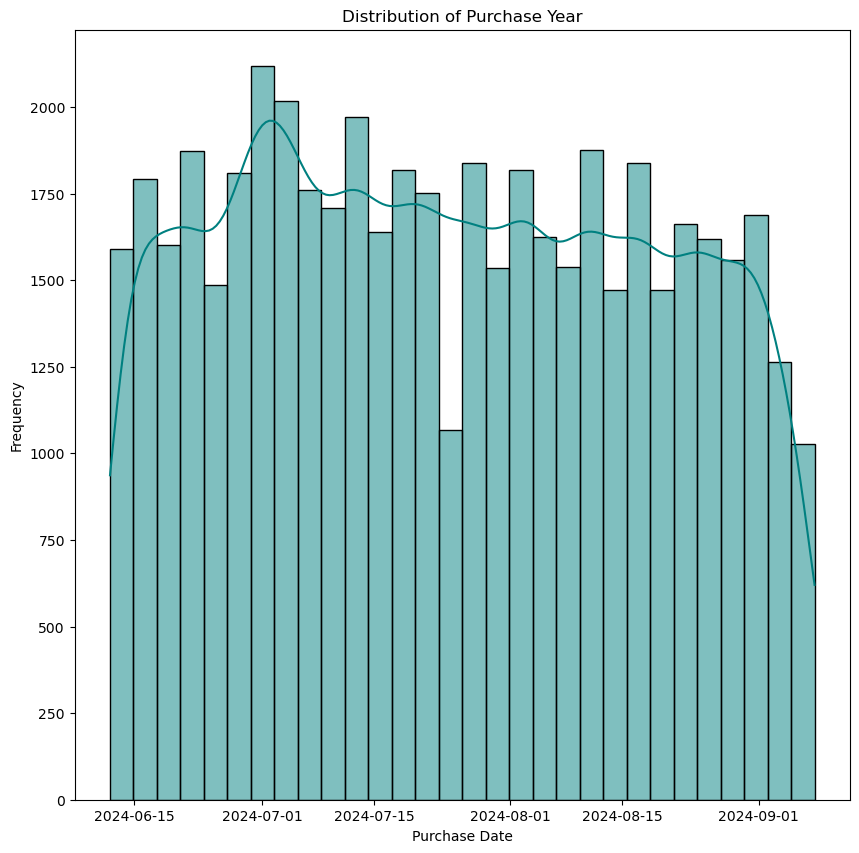

In [47]:
#Purchase Date Distribution
plt.figure(figsize=(10, 10))
sns.histplot(transactions['PURCHASE_DATE'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of Purchase Year")
plt.xlabel("Purchase Date")
plt.ylabel("Frequency")
plt.show()

Purchase dates span across 2024. We may have multiple transactions within one purchase date. 
<br>
<br> Scan Date

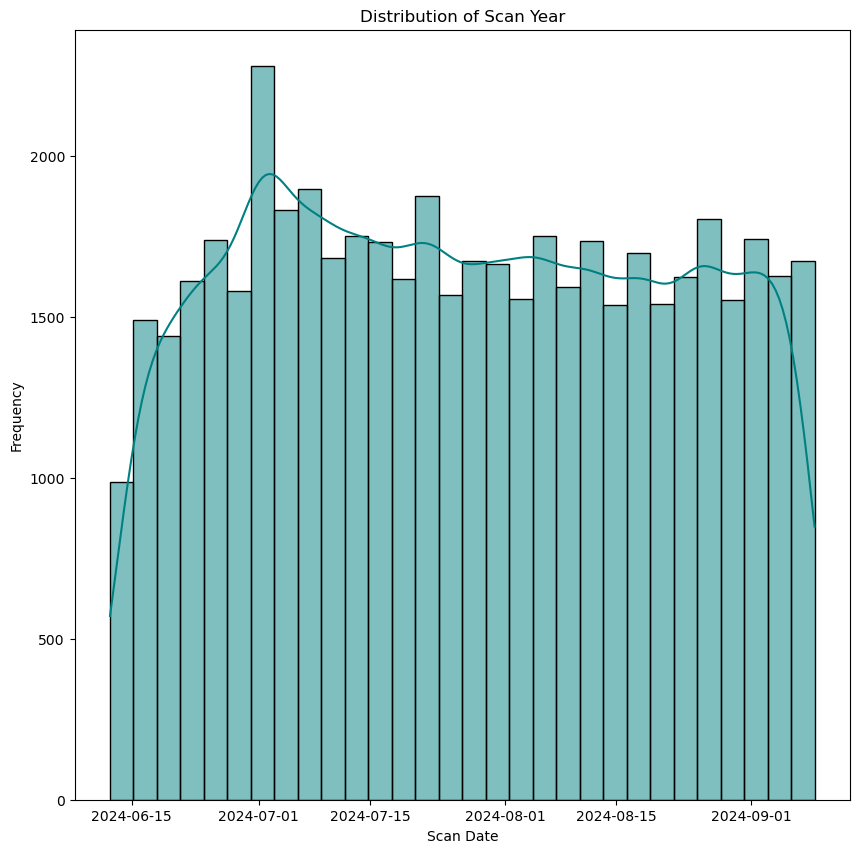

In [48]:
#Scan Date Distribution
plt.figure(figsize=(10, 10))
sns.histplot(transactions['SCAN_DATE'].dropna(), bins=30, kde=True, color='teal')
plt.title("Distribution of Scan Year")
plt.xlabel("Scan Date")
plt.ylabel("Frequency")
plt.show()

Scan dates span across 2024. We may have multiple transactions within one scan date. 
<br>
<br> Store Name

<Axes: >

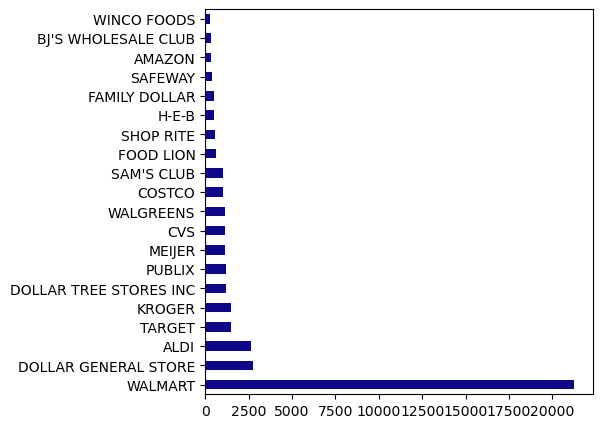

In [49]:
#Checking the count of values for top 20 stores
plt.figure(figsize = (5,5))
store_count = transactions['STORE_NAME'].value_counts(dropna = False).head(20)
store_count.plot(kind = 'barh', cmap = plt.get_cmap('plasma'))

User ID
<br>User ID is pretty important in our analysis. It is the primary key to identify users from the user table. The transaction table can have duplicate user IDs since one user may have multiple transactions. However, we need to make sure we can map all users in the transaction table to users in the Users Table. 

In [50]:
#Checking if all user IDs in the transaction table is in the Users table
match_ID = transactions['USER_ID'].isin(users['ID'])
existing_users = transactions[match_ID]
non_existing = transactions[~match_ID]
print("There are", existing_users['USER_ID'].nunique(),"existing users and ",non_existing['USER_ID'].nunique(),"non-existing users.")

There are 91 existing users and  17603 non-existing users.


There are only 91 users that are common between the users table and the transactions table. We will be unable to map the remaining 17,603 users since they don't exist in the users table. <br>
<br> Barcode <br>
Barcode is also another important column that is the unique ID to the products table. We will need to check how many of the barcodes in the transaction table match with the products table just as we did with the USER_ID field with the users table

In [51]:
#Checking if all user IDs in the transaction table is in the Users table
match_barcode = transactions['BARCODE'].isin(products['BARCODE'])
existing_codes = transactions[match_barcode]
non_existing = transactions[~match_barcode]
print("There are", existing_codes['BARCODE'].nunique(),"existing barcodes and ",non_existing['BARCODE'].nunique(),"non-existing barcodes.")

There are 6562 existing barcodes and  4465 non-existing barcodes.


There are only 6,562 barcodes that are common between the products table and the transactions table. We will be unable to map the remaining 4,465 users since they don't exist in the products table.<br>
<br> Final Quantity <br>
We already know that final quantity has some missing/null values. 

In [52]:
#Checking for the statistics of the final_quantity column
transactions['FINAL_QUANTITY'].describe()

count    37338.000000
mean         1.086275
std          2.060699
min          0.010000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64

In [53]:
# Checking for the number of values for each quantity
transactions['FINAL_QUANTITY'].value_counts(dropna = False)

1.00    35536
NaN     12491
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: FINAL_QUANTITY, Length: 87, dtype: int64

Final Sale

In [54]:
#Checking for the statistics of the final_quantity column
transactions['FINAL_QUANTITY'].describe()

count    37338.000000
mean         1.086275
std          2.060699
min          0.010000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY, dtype: float64

In [55]:
# Checking for the number of values for each quantity
transactions['FINAL_QUANTITY'].value_counts(dropna = False)

1.00    35536
NaN     12491
2.00     1285
3.00      184
4.00      139
        ...  
6.22        1
1.22        1
1.23        1
2.57        1
2.27        1
Name: FINAL_QUANTITY, Length: 87, dtype: int64

In [56]:
transactions.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.0,NaN
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,NaN,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.0,NaN
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,NaN,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.0,NaN
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247000+00:00,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,NaN,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586000+00:00,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.0,NaN
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902000+00:00,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,NaN,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931000+00:00,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.0,NaN
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787000+00:00,ALDI,66686fc2e04f743a096ea808,NaN,NaN,2.29


One thing that is apparent with the final sale and quantity columns is that there is a possibility to have a null value for final quantity and still have a final sale and have a null value for final sale and still have a quantity. Although we don't have information on the price of each barcode, one thing we can deduce is that we cannot have a quantity on a transaction and not have a final sale amount. Hence, we can eliminate all the rows where we have a quantity populated but a sale that is null.

In [57]:
#Fetching all records that have a final quantity but no final sale
transactions = transactions[(~transactions['FINAL_QUANTITY'].isna()) & (~transactions['FINAL_SALE'].isna())]
transactions.head(10)

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
25000,7b3ec72d-9d30-40b8-b185-0bfb638942a9,2024-08-20,2024-08-20 11:17:29.633000+00:00,DOLLAR GENERAL STORE,60fc1e6deb7585430ff52ee7,7.455271e+11,1.0,1.65
25001,04869b68-29e3-4e8d-9bdb-950046fc3473,2024-08-05,2024-08-09 16:06:00.570000+00:00,DOLLAR GENERAL STORE,654cf234a225ea102b81072e,7.455271e+11,1.0,1.65
25002,f1a96308-24a5-46a8-8d8c-285cf9dce1ba,2024-09-03,2024-09-03 11:28:25.264000+00:00,WALMART,63c1cb6d3d310dceeac55487,3.700083e+10,1.0,28.22
25003,7ee1798e-fd2e-4278-838b-f417fdcafe08,2024-08-30,2024-09-04 12:53:31.478000+00:00,DOLLAR GENERAL STORE,65c29b137050d0a6206cd24f,1.200050e+10,1.0,5.25
25004,21feab39-49f2-42e9-ae69-10371e2fc0a9,2024-08-23,2024-08-27 10:45:00.125000+00:00,TARGET,61a58ac49c135b462ccddd1c,2.400039e+10,1.0,2.59
25005,30977cbc-1d29-4f2d-851c-1104432769d0,2024-09-01,2024-09-01 09:40:16.103000+00:00,WALMART,5baf733455206419c416c3be,3.700078e+10,1.0,2.20
25006,48c7720b-7097-4cee-995e-721e52c623bd,2024-06-25,2024-06-25 17:56:43.654000+00:00,COSTCO,65c5b9a416cc39173210ae15,9.697867e+06,1.0,9.69
25007,d542a912-30a7-4f73-89a8-365f8de17409,2024-08-12,2024-08-15 18:34:31.745000+00:00,FOOD LION,6567a084bc6a13d85a5cf0dd,7.527981e+11,2.0,1.58
25008,c70b5591-92a5-4d9f-8d82-5525cf91cfaf,2024-06-20,2024-06-21 11:32:23.957000+00:00,WALMART,62f069014e73e2db30ecab93,1.700013e+10,1.0,8.76
25009,21a0945c-09ec-4b76-92e4-f2e590062470,2024-07-29,2024-08-02 13:27:25.284000+00:00,MARKET BASKET,6318f67ab2906b770ead6e92,7.020050e+10,1.0,3.49


In [58]:
#Exporting updated datasets
users.to_csv('users_updated.csv', index = False)
products.to_csv('products_updated.csv', index = False)
transactions.to_csv('transactions_updated.csv', index = False)

**Summary - <br>
The transactions table has users and barcodes that are missing in the users and products table. This makes it challenging to map all transactions. We also have transactions with nulls as final quantity and sales amount. This most certainly has to be an error because a receipt gets generated once a payment has been made which means we can't have receipts with blank sales.**

Now that all tables' have been subject to data exploration techniques, the next steps would have to include imputation techniques to fill in missing data from all tables and potentially introducing data entry regulations that avoid these data entry errors from being made. Some such regulations could be -
<br> Users Table <br>
<li> <b>Age restrictions</b> - Only allow users with a specific age to create an account and periodically remove users that have ages crossing 110. </li>
<li> <b>Auto-updates for location and language</b> - Have a way to track the users location if allowed or mandate the selection of state to proceed with creating an account </li>
<br> Products Table <br>
<li> <b>Consistent Barcodes</b>- Ensuring that only one bar code is used for each unique category-brand-manufacturer pair </li>
<li> <b>Updated Categories</b> - Products that do not have a category 3 and 4 can be assigned a value to denote that they only have 1 or 2 categories.</li>
<li> <b>Ensuring unifrom collection of brand and manufacturer data</b> - This will help eliminate null data and will help better mapping of products to analyze product based metrics.</li>
<br>Transactions Table <br>
<li> <b>Uniformity with User IDs and barcodes</b> - Ensuring that all user_IDs and barcodes are available in their respective parent tables </li>
<li> <b>Consistent Price and Quantity Information</b> - Mandating all fields that have a quantity to require a price and vice versa. </li>

---

<b>Are there any data quality issues?</b>
<br>
There are a few data quality issues across these datasets, ranging from missing values and inconsistencies to placeholder entries and duplicates. Below is a closer look at some of the key issues in each table.<br>
<u><b>Users Table</b></u><br>
Missing Data:
<li>GENDER: Around 6% of users don’t have a gender recorded, which might limit the effectiveness of demographic-based insights.</li>
<li>STATE: Roughly 5% of users don’t have a state listed, which could make regional analysis or location-based targeting less reliable.</li>
<li>LANGUAGE: 31% of language fields are empty, which could be a problem if language preferences are important for user communication or personalization.</li>
<li>BIRTH_DATE: Around 4% of users don’t have a birth date recorded, and another 2% are set to a default value of "1970-01-01 00:00:00+00:00," which seems like a placeholder. It’s unclear if this was used intentionally or just as a default for missing data.</li>
<br>
Inconsistent Data:<br>
<li>GENDER: The gender field has redundant or overlapping categories, like "not_listed," "My gender isn't listed," "Prefer not to say," and "prefer_not_to_say." These likely came from inconsistent data entry methods and should be standardized.</li>
<li>BIRTH_DATE: There are quite a few extreme outliers, including users over 100 or even 120 years old and users as young as 3 years old. While this isn’t impossible, the sheer number of these cases suggests possible data entry errors.</li><br>
<u><b>Products Table</b></u><br>
Missing Data:<br>
<li>CATEGORY_3: About 7% of records are missing data in this field—not a huge percentage, but still something to consider for product categorization.</li>
<li>CATEGORY_4: A massive 92% of records are blank, raising the question of whether this field is actually useful or just outdated.</li>
<li>MANUFACTURER: About 27% of products don’t have a manufacturer listed, which makes it harder to track trends or group products by brand.</li>
<li>BRAND: Similarly, 27% of products don’t have a brand recorded, which could impact brand-based reporting or marketing efforts.</li><br>
Placeholder Values:<br>
<li>MANUFACTURER: Roughly 13% of manufacturer fields contain placeholders like "PLACEHOLDER MANUFACTURER". This suggests missing information that hasn’t been properly filled in.
<li>BRAND: Around 5% of brand names use placeholder values like "BRAND NOT KNOWN," which means those products don’t have reliable brand data.</li><br>
Data Integrity Issues:
<li>BARCODE: Some products have missing or duplicate barcode values, which could cause issues with inventory tracking, product identification, and sales data accuracy.</li><br>
<u><b>Transactions Table</b></u><br>
Duplicate Records:<br>
<li>RECEIPT_ID: There are multiple types of duplicate receipt entries, making the data messy - Some duplicates vary in FINAL_SALE, FINAL_QUANTITY, and BARCODE, which could make sense for multi-item purchases, but the presence of null values suggests there might be inconsistencies.</li><br>
Limited Date Range:<br>
<li>PURCHASE_DATE: The transaction data only covers 89 days in 2024, which makes it hard to analyze long-term trends or patterns.</li><br>
User Data Coverage Issues:
<li>Only 91 users from the Transactions table appear in the Users table, which suggests that the Users table is incomplete or not properly connected to the Transactions data. This could be a big issue for any analysis that tries to link transactions back to user behavior.</li><br>
Data Integrity Problems:<br>
<li>BARCODE: About 11% of barcodes in the Transactions table are missing, making it harder to match transactions to products accurately.</li>
<li>Product Matching: Only 59% of barcodes in Transactions match those in the Products table, which raises questions about how products are being recorded across different systems.</li><br>

<br>

<b>Are there any confusing or hard-to-interpret fields?</b><br>
There are a few fields are unclear or seem inconsistent, which makes it difficult to know exactly how they should be used. Here are some that stand out:<br>
Users Table<br>
<li>GENDER: The mix of responses like "Prefer not to say" and "prefer_not_to_say" suggests inconsistent input methods. It would be helpful to have a standardized format for this field.</li>
<li>BIRTH_DATE: The use of "1970-01-01" as a default and the presence of outliers (people supposedly over 100 years old) make it unclear whether these values are intentional, placeholders, or just errors.<br>
<br>Products Table<br>
<li>CATEGORY_3 & CATEGORY_4: The fact that 92% of CATEGORY_4 is empty makes it questionable whether this field is still relevant. Are these categories actively used, or are they just legacy fields that are no longer maintained?</li>
<li>MANUFACTURER & BRAND: Placeholder values like "PLACEHOLDER MANUFACTURER" suggest uncertainty in the data. Are these placeholders meant to be temporary, or do they indicate missing values that should be removed or replaced?</li><br>
Transactions Table<br>
<li>RECEIPT_ID: The presence of so many different types of duplicates raises concerns about whether these records are valid. Are they accidental duplicates, or do they represent multiple items on a single receipt?</li>
<li>BARCODE: The fact that only 59% of transaction barcodes match those in the Products table suggests a potential data mapping issue. Are multiple barcodes being used for the same product, or is this a data entry problem?</li>
<li>USER_ID: The large gap between users in the Transactions table and those in the Users table suggests a disconnect. Is this due to missing records, or is the Users table just not up to date?</li>


<h2> SQL Queries </h2>

**What are the top 5 brands by receipts scanned among users 21 and over?**
```SQL
SELECT
  p.BRAND AS Brand, -- Select the brand name from the products table
  COUNT(DISTINCT t.RECEIPT_ID) AS Receipts_Count -- Count unique receipts for each brand
FROM
  transactions t -- Start with the transactions table
  INNER JOIN users u ON t.USER_ID = u.ID -- Join users to filter by age
  INNER JOIN products p ON t.BARCODE = p.BARCODE -- Join products to get brand info
WHERE
  u.BIRTH_DATE <= DATE_SUB(CURRENT_DATE(), INTERVAL 21 YEAR) -- Filter users aged 21 and over
  AND p.BRAND IS NOT NULL -- Ensure the brand is not null
GROUP BY
  p.BRAND -- Group results by brand
ORDER BY
  Receipts_Count DESC -- Sort by the number of receipts in descending order
LIMIT 5; -- Limit the results to the top 5 brands
```

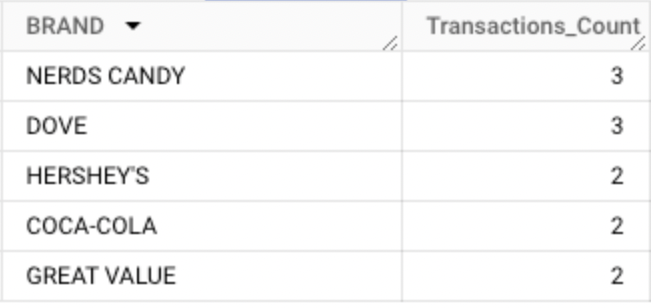


**What are the top 5 brands by sales among users that have had their account for at least six months?**

```sql
SELECT
  p.BRAND AS Brand, -- Select the brand name from the products table
  SUM(t.FINAL_SALE) AS Sales_Volume -- Calculate the total sales volume for each brand
FROM
  transactions t -- Start with the transactions table
  INNER JOIN users u ON t.USER_ID = u.ID -- Join users to filter by account age
  INNER JOIN products p ON t.BARCODE = p.BARCODE -- Join products to get brand info
WHERE
  u.CREATED_DATE <= DATE_SUB(CURRENT_DATE(), INTERVAL 6 MONTH) -- Filter users with accounts at least 6 months old
  AND p.BRAND IS NOT NULL -- Ensure the brand is not null
GROUP BY
  p.BRAND -- Group results by brand
ORDER BY
  Sales_Volume DESC -- Sort by sales volume in descending order
LIMIT 5; -- Limit the results to the top 5 brands
```

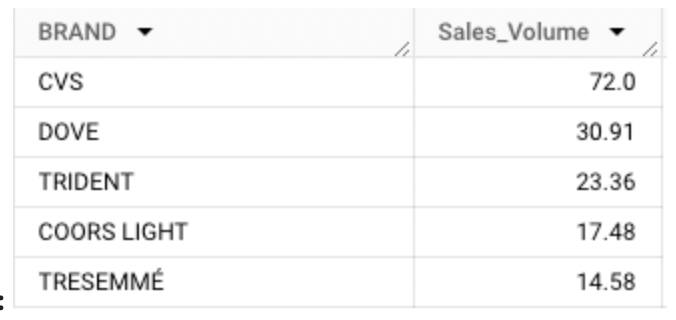

**Which is the leading brand in the Dips & Salsa category?**

Assuming that the leading brand is the brand that has the most number of receipts or in other words, the most commonly bought brand in the dips and salsa category.

```sql
WITH brand_receipts AS (
  SELECT 
    p.BRAND,
    COUNT(DISTINCT t.RECEIPT_ID) AS Receipt_Count  -- Count unique receipts for each brand
  FROM
    transactions t  -- Transactions table
    JOIN products p ON t.BARCODE = p.BARCODE  -- Join with products table to get brand details
  WHERE
    p.CATEGORY_2 = 'Dips & Salsa'  -- Filter products in the 'Dips & Salsa' category
    AND p.CATEGORY_2 IS NOT NULL  -- Exclude records where the category is null
  GROUP BY 1  -- Group results by brand
  ORDER BY 2 DESC  -- Order by receipt count in descending order
)

-- Select the top brand based on the number of receipts scanned
SELECT
  BRAND
FROM
  brand_receipts
LIMIT 1  -- Limit the result to the top 1 brand
```

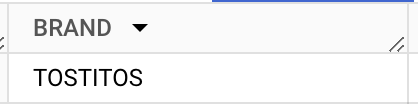